## **Euromart Sales and Profitability Analysis**
- Identify key factors influencing sales and profitability in different regions, product categories, and transaction types to optimize operations and pricing strategies.
- **Identifying Top Performers:** Pinpoint regions, product categories, and transaction types driving highest sales and profitability to replicate successful strategies.
- **Understanding Challenges:** Address operational inefficiences and customer engagement issues in underperforming areas.
- **Optimizing Discounts and Shipping Modes:** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
from sqlalchemy import create_engine, types

import warnings
warnings.filterwarnings('ignore')

In [2]:
Conn = mysql.connector.connect(
    host='localhost',               # host name
    user='root',                    # the user who has privilege to the database
    password='root',                # password for user
    database='eda_practice',        # database name
)

In [3]:
query = 'select * from euromart_stores;'

In [4]:
df = pd.read_sql(query, Conn)
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True


In [5]:
#Conn.close()

In [6]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [7]:
df.tail()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [8]:
df.shape

(8047, 17)

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
 16  Feedback?      8047 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.

### **Data Cleaning**

In [11]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.rename(columns={'Feedback?': 'Feedback'}, inplace=True)    # Renaming column name

#### **Feature Engineering**

In [15]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [16]:
def quarter(col):
    if col <= 3:
        return 'Quarter 1'
    elif col <= 6:
        return 'Quarter 2'
    elif col <= 9:
        return 'Quarter 3'
    else:
        return 'Quarter 4'
    
df['Quarter'] = df['Month'].apply(quarter)

In [17]:
df['Discount'] = df['Discount']*100

In [18]:
df['Total_Sales'] = df['Sales'] * df['Quantity']
df['Total_Profit'] = df['Profit'] * df['Quantity']

In [19]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Discount,Sales,Profit,Quantity,Feedback,Year,Month,Quarter,Total_Sales,Total_Profit
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,50.0,45,-26,3,False,2011,1,Quarter 1,135,-78
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,0.0,854,290,7,True,2011,1,Quarter 1,5978,2030
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,...,0.0,140,21,3,True,2011,1,Quarter 1,420,63
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,50.0,27,-22,2,True,2011,1,Quarter 1,54,-44
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,50.0,17,-1,2,True,2011,1,Quarter 1,34,-2


In [20]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

### **Data Reduction**

In [21]:
df.drop(columns=['Order ID','Order Date'], inplace=True)

In [22]:
df.head(1)

,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback,Year,Month,Quarter,Total_Sales,Total_Profit
0,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45,-26,3,False,2011,Jan,Quarter 1,135,-78


In [23]:
df.shape

(8045, 20)

In [24]:
df.columns

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Discount',
       'Sales', 'Profit', 'Quantity', 'Feedback', 'Year', 'Month', 'Quarter',
       'Total_Sales', 'Total_Profit'],
      dtype='object')

### **Exploratory Data Analysis**

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8045.0,11.007458,18.178693,0.0,0.0,0.0,10.0,85.0
Sales,8045.0,291.903170,485.258616,3.0,48.0,117.0,313.0,6517.0
Profit,8045.0,35.202237,178.147747,-3060.0,1.0,14.0,47.0,2476.0
Quantity,8045.0,3.772281,2.203610,1.0,2.0,3.0,5.0,14.0
Year,8045.0,2012.728900,1.100367,2011.0,2012.0,2013.0,2014.0,2014.0
Total_Sales,8045.0,1479.008080,3726.216265,3.0,128.0,414.0,1274.0,80206.0
Total_Profit,8045.0,171.520199,1325.592598,-36720.0,1.0,40.0,182.0,29712.0


In [26]:
df.describe(include='object').T

,count,unique,top,freq
Customer Name,8045,792,Joel Peters,32
Country,8045,15,France,1916
State,8045,127,England,1187
City,8045,999,London,219
Region,8045,3,Central,4425
Segment,8045,3,Consumer,4173
Ship Mode,8045,4,Economy,4860
Category,8045,3,Office Supplies,5284
Sub-Category,8045,17,Art,1151
Product Name,8045,1810,"Eldon File Cart, Single Width",26


In [27]:
cat_col = df.select_dtypes(exclude=['int', 'float']).columns
num_col = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(cat_col)
print(num_col)

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Feedback',
       'Month', 'Quarter'],
      dtype='object')
['Discount', 'Sales', 'Profit', 'Quantity', 'Year', 'Total_Sales', 'Total_Profit']


#### **Univarient Analysis**

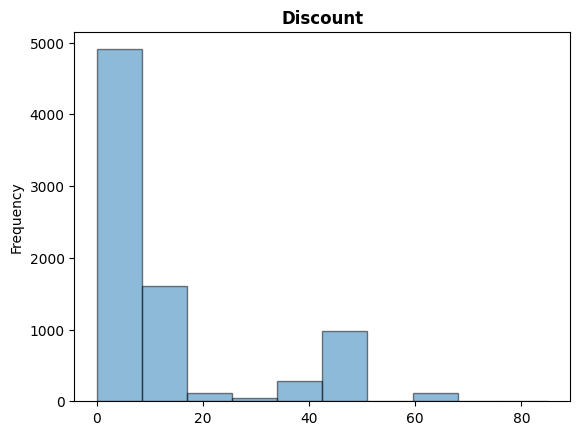

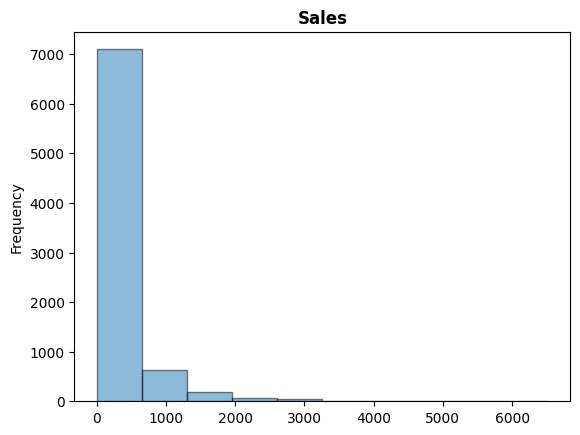

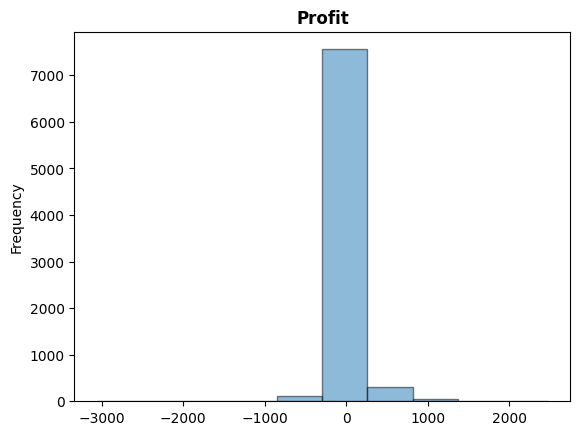

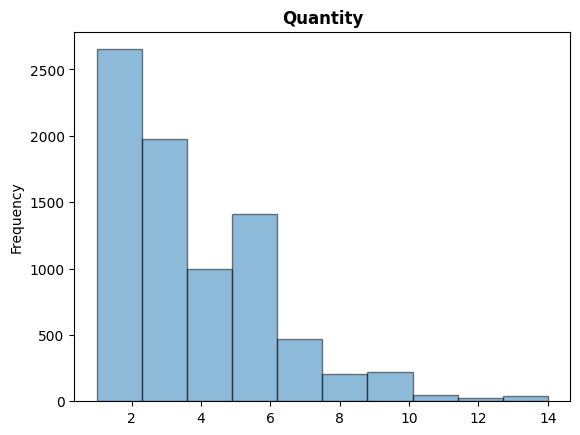

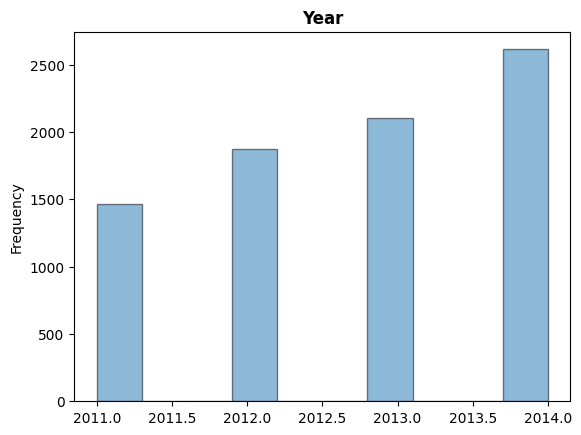

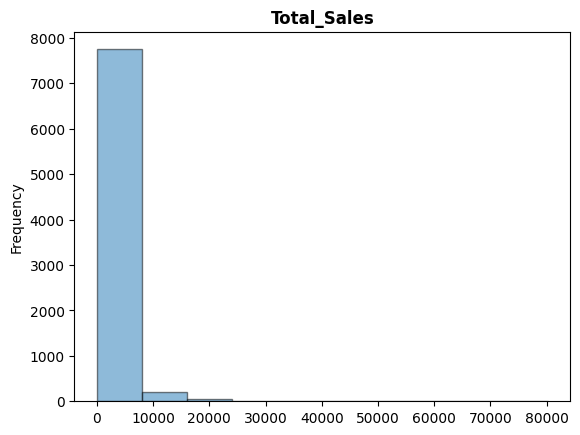

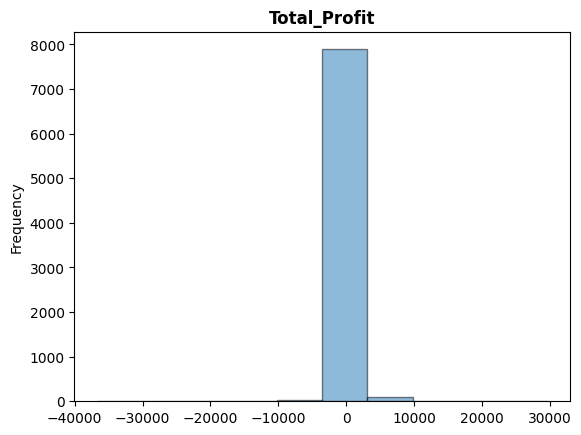

In [28]:
# Univarient Analysis for numerical variable
for col in num_col:
    
    plt.figure()
    plt.hist(df[col], bins=10, alpha=0.5, edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='black')
    
    plt.show()

In [29]:
cat_col = ['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Feedback',
       'Quarter']

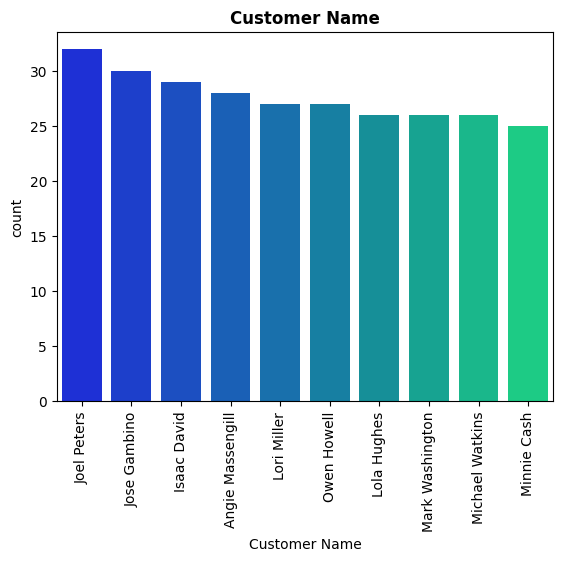

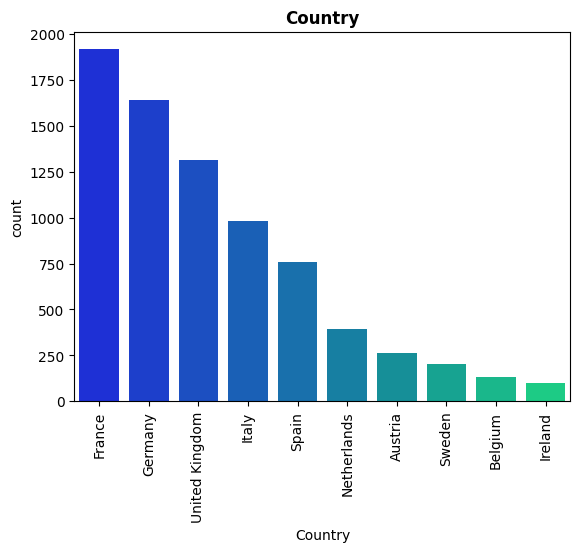

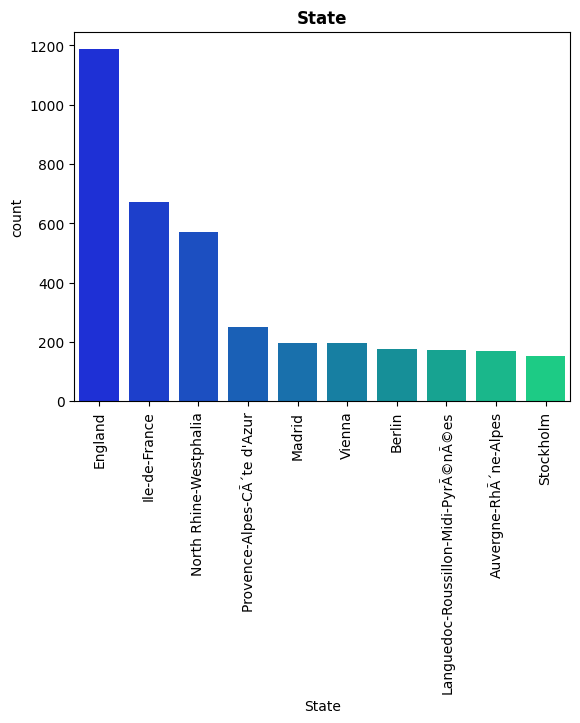

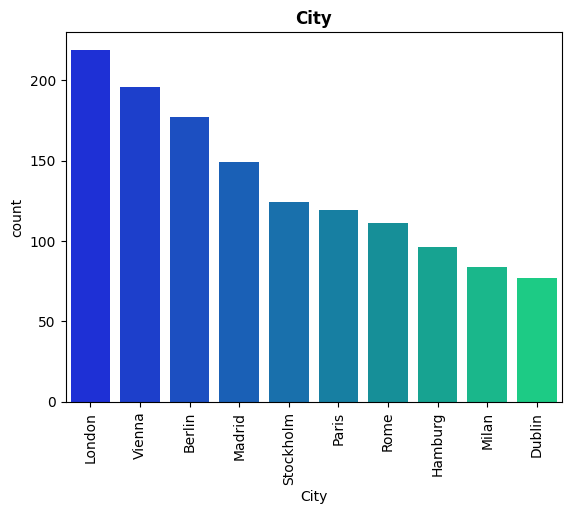

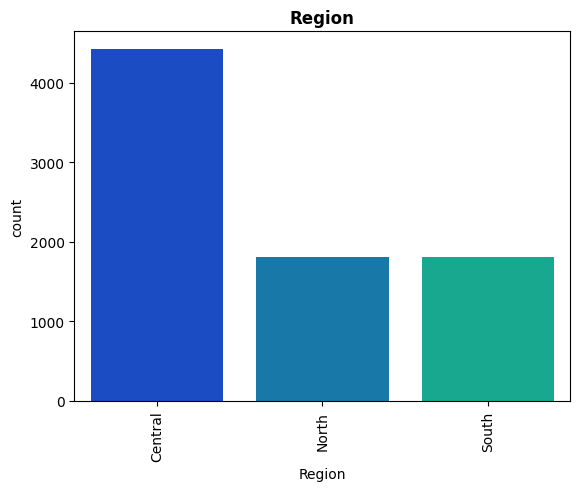

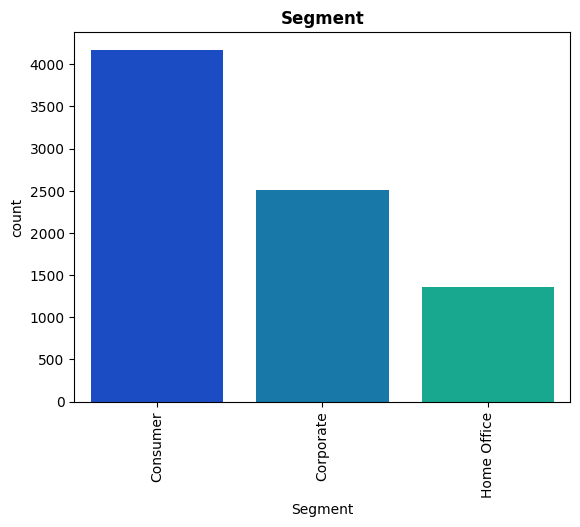

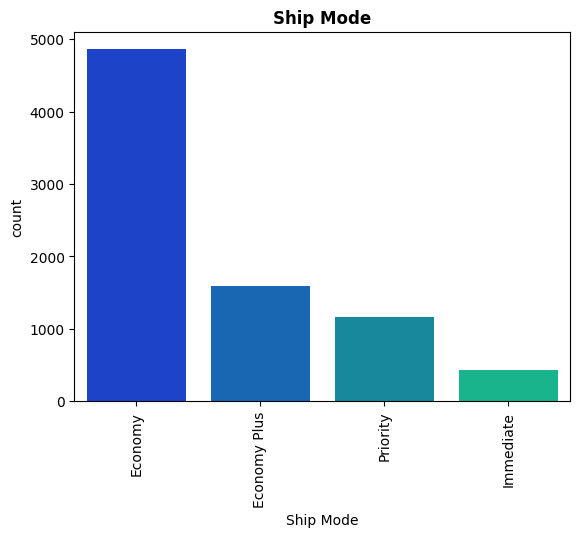

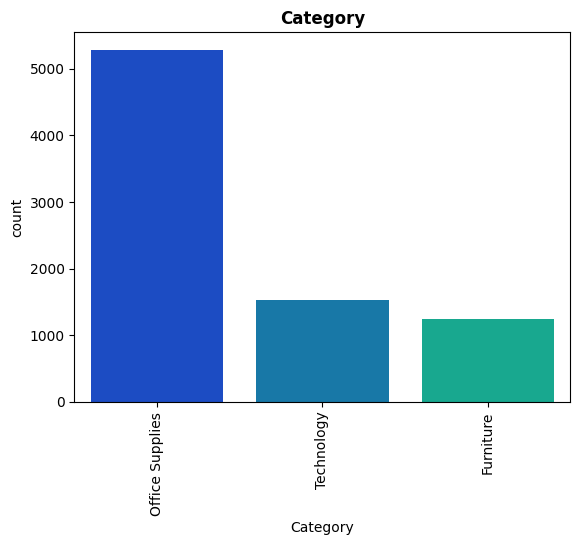

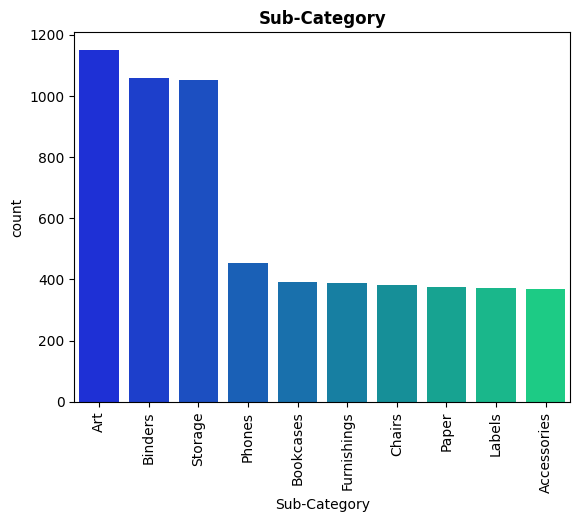

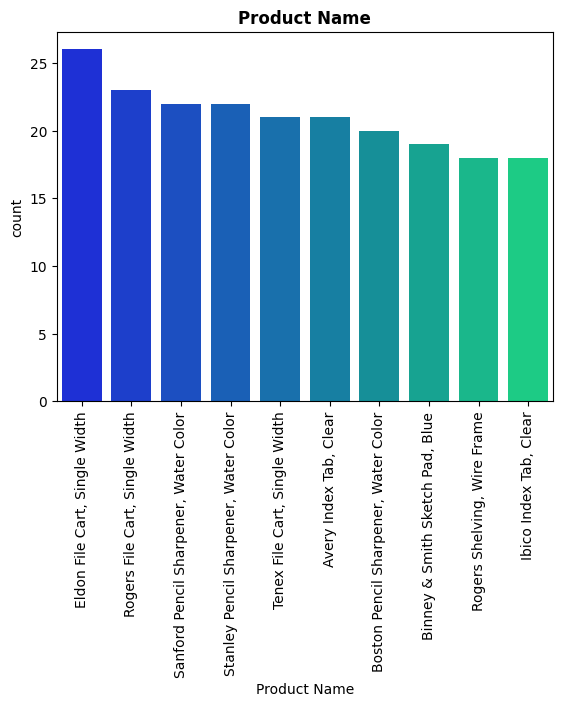

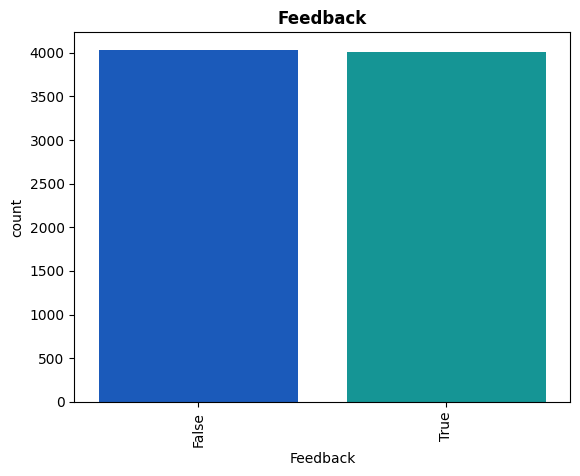

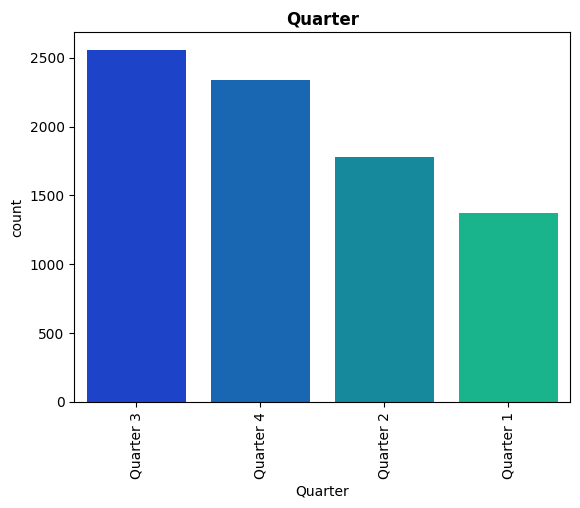

In [30]:
# Bivarient Analysis with two variables
for col in cat_col:
    
    plt.figure()
    sns.countplot(x=col, data = df, order=df[col].value_counts().head(10).index, palette='winter')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='black') 
    
    plt.show()   

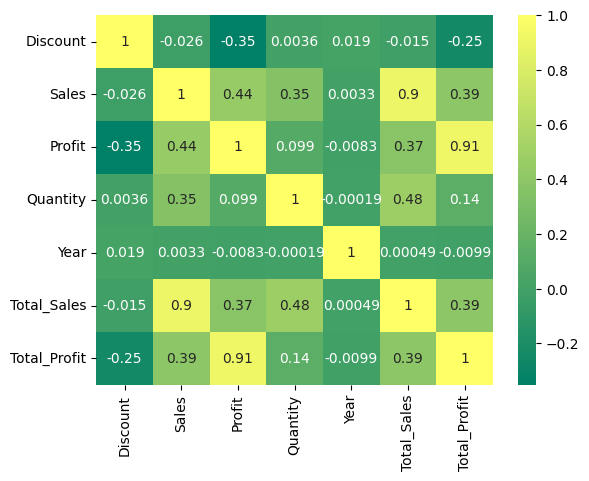

In [31]:
cor = df[num_col].corr('pearson')
sns.heatmap(cor, annot=True, cmap='summer')
plt.show()

#### **Finding the Insights**

In [32]:
# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

#### **Net Sales**

In [33]:
print(f'Net Sales {df['Sales'].sum()}')

Net Sales 2348361


#### **Net Profit**

In [34]:
print(f'Net Profit {df['Profit'].sum()}')

Net Profit 283202


In [35]:
print(f'Gross Sales {df['Total_Sales'].sum()}')

Gross Sales 11898620


In [36]:
print(f'Gross Profit {df['Total_Profit'].sum()}')

Gross Profit 1379880


#### **Profit Margin**

In [37]:
print(f'Profit Margin {round(df['Total_Profit'].sum()/df['Total_Sales'].sum()*100)}%')

Profit Margin 12%


##### **Contribution of the Year and Month to the most Sales and Profit**

In [42]:
#pip install jinja2


   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 7.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# Group data by month and calculate sum
year_analysis = df.groupby('Year').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum',
    }).reset_index().sort_values(by='Sales', ascending=False)

In [60]:
year_analysis.style.background_gradient(cmap='Reds')

,Year,Sales,Profit,Quantity
3,2014,755030,85330,9833
2,2013,630140,77172,7935
1,2012,548843,66213,7096
0,2011,414348,54487,5484


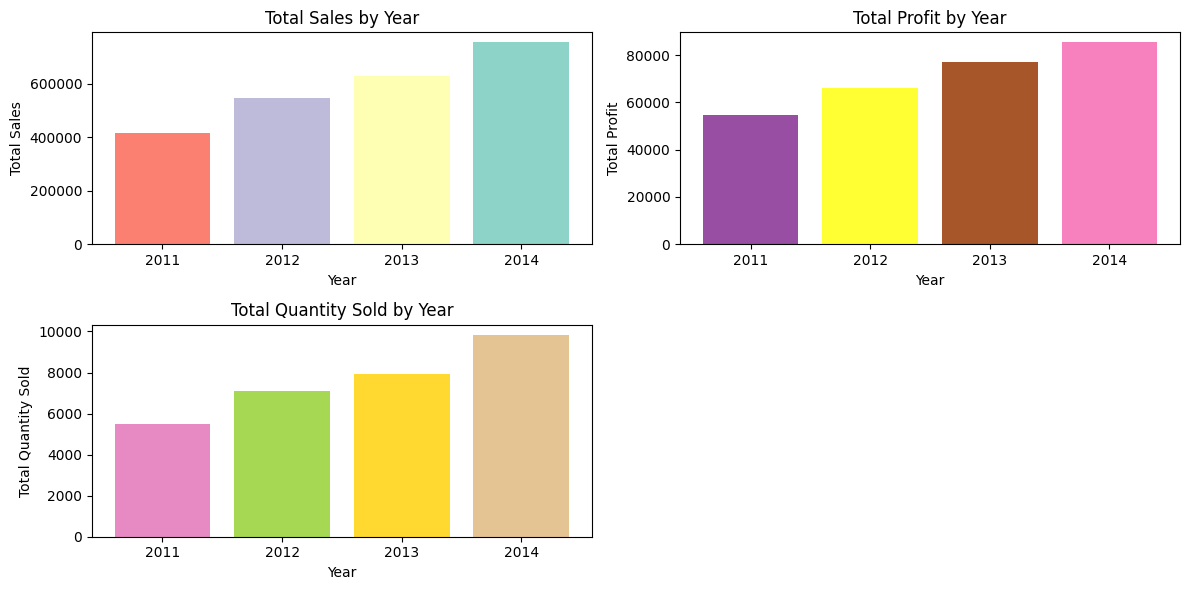

In [61]:
plt.figure(figsize=(12, 6))

# Sales Plot
plt.subplot(2,2,1)
plt.bar(year_analysis['Year'], year_analysis['Sales'], color=sns.color_palette('Set3'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Profit Plot
plt.subplot(2,2,2)
plt.bar(year_analysis['Year'], year_analysis['Profit'], color=sns.color_palette('Set1_r'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')

# Quantity Plot
plt.subplot(2,2,3)
plt.bar(year_analysis['Year'], year_analysis['Quantity'], color=sns.color_palette('Set2_r'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Year')

plt.tight_layout()
plt.show()

In [53]:
month_analysis = df.groupby('Month').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [56]:
month_analysis.style.background_gradient(cmap='Oranges')

,Month,Sales,Profit,Quantity
0,Aug,303089,38476,4207
1,Sep,295289,37423,3695
2,Nov,277239,28533,3687
3,Dec,272751,34103,3556
4,June,271744,31769,3291
5,July,146159,16694,1695
6,May,142461,16171,1778
7,Jan,139157,17507,1753
8,Apr,132051,16004,1686
9,Feb,123685,14482,1618


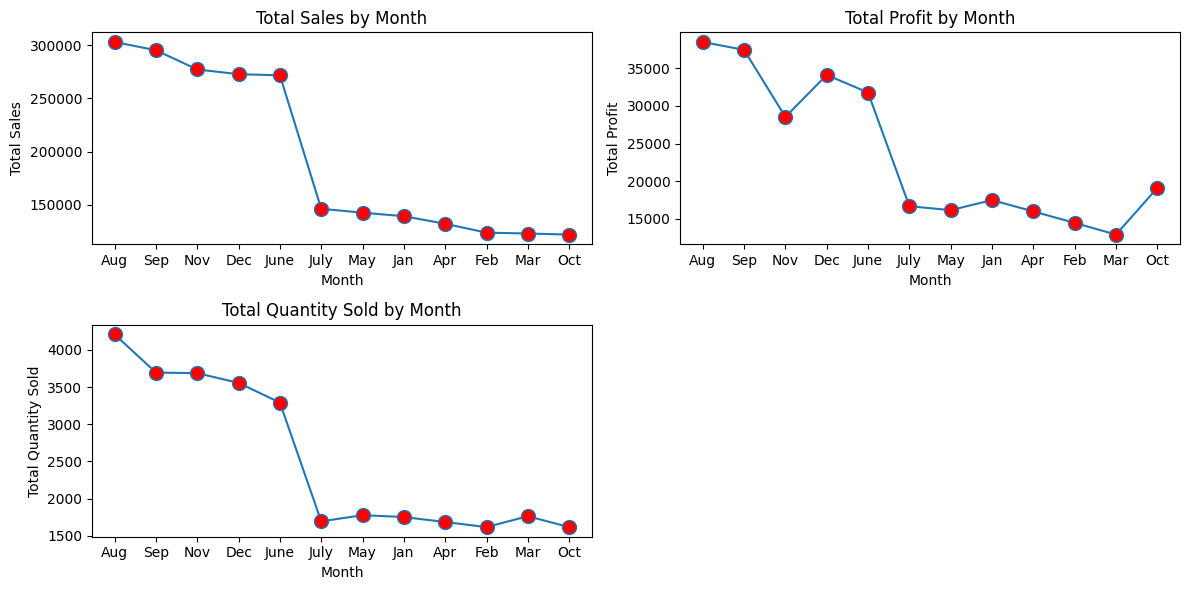

In [150]:
plt.figure(figsize=(12, 6))

# Sales Plot
plt.subplot(2,2,1)
plt.plot(month_analysis['Month'], month_analysis['Sales'], marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Profit Plot
plt.subplot(2,2,2)
plt.plot(month_analysis['Month'], month_analysis['Profit'], marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Profit by Month')

# Quantity Plot
plt.subplot(2,2,3)
plt.plot(month_analysis['Month'], month_analysis['Quantity'], marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Month')

plt.tight_layout()
plt.show()

In [44]:
# Group data by month and calculate the sum
Quarter_Analysis = df.groupby('Quarter').agg({
    'Sales':'sum',
    'Profit':'sum', 
    'Quantity':'sum',
    }).sort_values(by='Sales', ascending=False).reset_index()

In [45]:
Quarter_Analysis.style.background_gradient(cmap='Blues')

,Quarter,Sales,Profit,Quantity
0,Quarter 3,744537,92593,9597
1,Quarter 4,671851,81746,8861
2,Quarter 2,546256,63944,6755
3,Quarter 1,385717,44919,5135


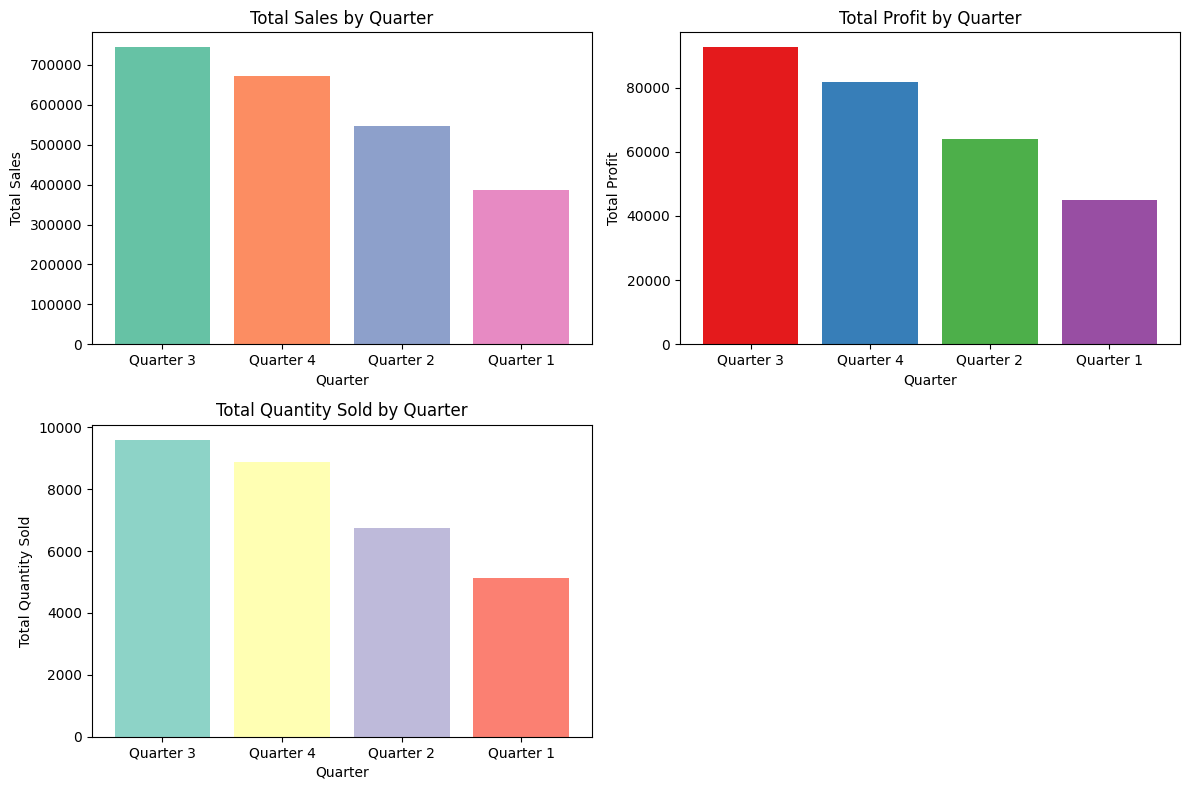

In [47]:
plt.figure(figsize=(12, 8))

# Sales Plot
plt.subplot(2,2,1)
plt.bar(Quarter_Analysis['Quarter'], Quarter_Analysis['Sales'], color=sns.color_palette('Set2'))
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')

# Profit Plot
plt.subplot(2,2,2)
plt.bar(Quarter_Analysis['Quarter'], Quarter_Analysis['Profit'], color=sns.color_palette('Set1'))
plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.title('Total Profit by Quarter')

# Quantity Plot
plt.subplot(2,2,3)
plt.bar(Quarter_Analysis['Quarter'], Quarter_Analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Quarter')

plt.tight_layout()
plt.show()

#### **Which ship mode has contributed the most to the sales and profit**

In [48]:
# Group data by month and calculate the sum
Ship_Mode_Analysis = df.groupby('Ship Mode').agg({
    'Sales':'sum',
    'Profit':'sum', 
    'Quantity':'sum',
    }).reset_index()

In [49]:
Ship_Mode_Analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')

,Ship Mode,Sales,Profit,Quantity
0,Economy,1412656,178658,18384
1,Economy Plus,483965,54336,6000
3,Priority,320426,32639,4405
2,Immediate,131314,17569,1559


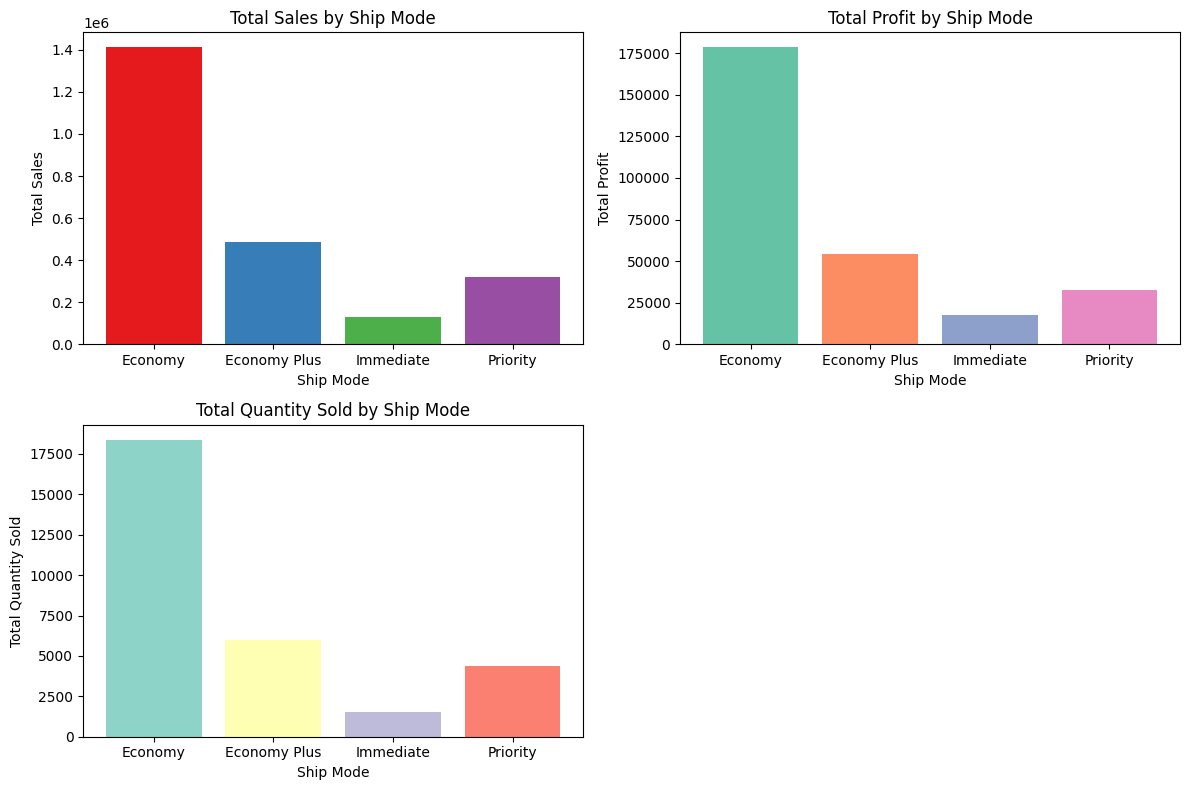

In [51]:
plt.figure(figsize=(12, 8))

# Sales Plot
plt.subplot(2,2,1)
plt.bar(Ship_Mode_Analysis['Ship Mode'], Ship_Mode_Analysis['Sales'], color=sns.color_palette('Set1'))
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.title('Total Sales by Ship Mode')

# Profit Plot
plt.subplot(2,2,2)
plt.bar(Ship_Mode_Analysis['Ship Mode'], Ship_Mode_Analysis['Profit'], color=sns.color_palette('Set2'))
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.title('Total Profit by Ship Mode')

# Quantity Plot
plt.subplot(2,2,3)
plt.bar(Ship_Mode_Analysis['Ship Mode'], Ship_Mode_Analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xlabel('Ship Mode')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Ship Mode')

plt.tight_layout()
plt.show()